# Innomatics Research Labs


## Internship Test Part 2
## Machine Learning Hackathon
## Name: Ankit Kumar Singh 

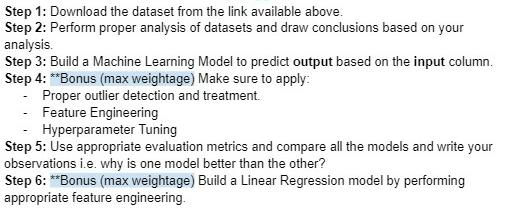

In [69]:
# Importing all libraries required in this notebook
import pandas as pd
import xgboost
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Data Link - https://drive.google.com/file/d/1RHvyeH_B5-9dTGKqg90IvCP3dAzIjGSo/view

In [45]:
# Reading data
df = pd.read_csv('dataa.csv')

In [46]:
# First 5 rows
df.head()

,Input,Output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [47]:
df.shape

(1111, 2)

In [48]:
df.dtypes

Input     float64
Output    float64
dtype: object

In [49]:
df.describe()

,Input,Output
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Input   1111 non-null   float64
 1   Output  1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [51]:
df.isna().sum()  #The isna() function is used to detect missing values. 

Input     0
Output    0
dtype: int64

<AxesSubplot:xlabel='Input'>

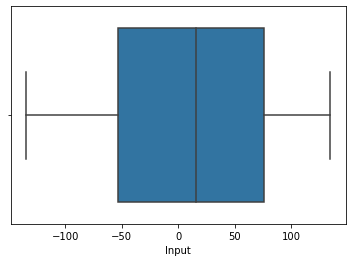

In [52]:
# Detecting Outliers for Input coloumn using Boxplot
sns.boxplot(df['Input'])

<AxesSubplot:xlabel='Output'>

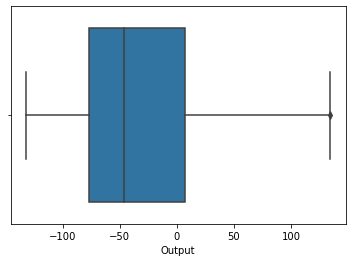

In [53]:
# Detecting Outliers for Output coloumn using Boxplot
sns.boxplot(df['Output'])

In [54]:
# Detecting the outliers for Input column using IQR and removing them.
# IQR
Q1 = np.percentile(df['Input'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Input'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Input'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Input'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1111, 2)
New Shape:  (1111, 2)


### This shows that there is no outlier in our input data 

In [55]:
# Detecting the outliers for Output column using IQR and removing them.
# IQR
Q1 = np.percentile(df['Output'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Output'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Output'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Output'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1111, 2)
New Shape:  (1110, 2)


### There was 1 outliers in our Output data which was successfully removed.

# Preparing the data:

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [56]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [57]:
## Standardization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [58]:
X[0:5]

array([[-1.63166921],
       [-1.61642498],
       [-1.78516879],
       [-1.60475819],
       [-1.7218566 ]])

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (888, 1) (888,)
Test Set:  (222, 1) (222,)


## Model Creation:

Now that our data is preprocessed. It's time to train and test our data on different models.

## Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

LR = LinearRegression()
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)


R2Linear = r2_score(y_test, y_pred)
MAELinear = mean_absolute_error(y_test,y_pred)
RMSELinear= np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R2 score for linear model: ', R2Linear)
print('Mean Absolute error: ', MAELinear)
print('RMSE:', RMSELinear)

R2 score for linear model:  0.2725025515250662
Mean Absolute error:  46.9777336331007
RMSE: 58.91142554077658


## Ridge Regression model

In [61]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha=0.05, normalize=True)
RR.fit(X_train,y_train)
y_pred = RR.predict(X_test)

R2ridge = r2_score(y_test, y_pred)
MAEridge = mean_absolute_error(y_test,y_pred)
RMSEridge= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for RidgeRegression model: ', R2ridge)
print('Mean Absolute error: ', MAEridge)
print('RMSE:', RMSEridge)

R2 score for RidgeRegression model:  0.2673563151782804
Mean Absolute error:  47.213473066183475
RMSE: 59.11942479664558


## Lasso Regression model

In [62]:
from sklearn.linear_model import Lasso

LR = Lasso(alpha=0.3, normalize=True)
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

R2Lasso = r2_score(y_test, y_pred)
MAELasso = mean_absolute_error(y_test,y_pred)
RMSELasso= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for LassoRegression model: ', R2Lasso)
print('Mean Absolute error: ', MAELasso)
print('RMSE:', RMSELasso)

R2 score for LassoRegression model:  0.22776041386975043
Mean Absolute error:  48.84195253567287
RMSE: 60.695965599644516


## Decision Tree Regressor model

In [63]:
from sklearn.tree import DecisionTreeRegressor


DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train,y_train)

y_predDT = DT.predict(X_test)

R2DecisionT = r2_score(y_test, y_predDT)
MAEDecisionT = mean_absolute_error(y_test,y_predDT)
RMSEDecisionT= np.sqrt(metrics.mean_squared_error(y_test, y_predDT))


print('R2 score for DecisionTree model: ', R2DecisionT)
print('Mean Absolute error: ', MAEDecisionT)
print('RMSE:', RMSEDecisionT)

R2 score for DecisionTree model:  0.7178711549320842
Mean Absolute error:  25.290333221529362
RMSE: 36.68660639061028


## Random Forest Regressor model

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, min_samples_split=5 ,max_features='sqrt', random_state =0)
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)


R2RandomF = r2_score(y_test, y_pred)
MAERandomF = mean_absolute_error(y_test,y_pred)
RMSERandomF= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for RandomForestRegression model: ', R2RandomF)
print('Mean Absolute error: ', MAERandomF)
print('RMSE:', RMSERandomF)

R2 score for RandomForestRegression model:  0.6914685851182663
Mean Absolute error:  22.872027181448477
RMSE: 38.3648487251159


## XGBoost model

In [70]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)


R2xgb = r2_score(y_test, y_predxgb )
MAExgb = mean_absolute_error(y_test,y_predxgb)
RMSExgb= np.sqrt(metrics.mean_squared_error(y_test, y_predxgb))


print('R2 score for XGB model: ', R2xgb)
print('Mean Absolute error: ', MAExgb)
print('RMSE:', RMSExgb)

R2 score for XGB model:  0.6566647792239326
Mean Absolute error:  22.822727264223076
RMSE: 40.4709103445731


In [88]:
modelRMSE =  {'Models':['Linear Regression Model', 'Ridge Regression Model', 'Lasso Regression Model', 'Decision Tree Model', 
'RandomForest Regressor Model','XGB Model'], 'RMSEScores':[RMSELinear,RMSEridge,RMSELasso,RMSEDecisionT,RMSERandomF,RMSExgb]}

In [86]:
# Create DataFrame 
df_score = pd.DataFrame(modelRMSE) 
df_score

,Models,RMSEScores
0,Linear Regression Model,58.911426
1,Ridge Regression Model,59.119425
2,Lasso Regression Model,60.695966
3,Decision Tree Model,36.686606
4,RandomForest Regressor Model,38.364849
5,XGB Model,40.470910


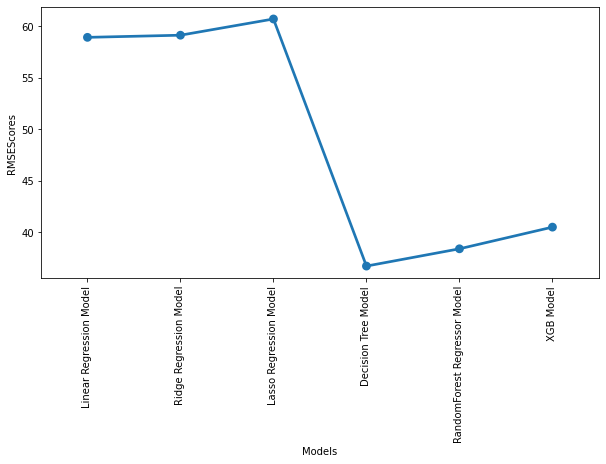

In [87]:
plt.figure(figsize=(10,5))
sns.pointplot(x='Models', y='RMSEScores', data = df_score)
plt.xticks(rotation=90);

# CONCLUSION:


The higher the R2 score, the better the performance of our model. And the lower the RMSE, the better the performance of our model. So we have Concluded that the Decision Tree Model is the best model compared to the other models in our case as it has highest R2 score and lowest RMSE than the rest of the models.